# Understanding Positional Encoding

In [11]:
import torch
seq_len = 8
torch.arange(0,seq_len, dtype=torch.float).unsqueeze(0)

tensor([[0., 1., 2., 3., 4., 5., 6., 7.]])

In [7]:
torch.arange(0,seq_len, dtype=torch.float).unsqueeze(0).shape

torch.Size([1, 8])

In [9]:
torch.arange(0,seq_len, dtype=torch.float).shape

torch.Size([8])

In [15]:
import math
d_model = 5
torch.exp(torch.arange(0, d_model,2).float()* (-math.log(10000.0)/d_model))

tensor([1.0000e+00, 2.5119e-02, 6.3096e-04])

In [47]:
position = torch.arange(0,seq_len, dtype=torch.float).unsqueeze(1)

In [48]:
div_term = torch.exp(torch.arange(0, d_model,2).float()*(-math.log(10000.0)/d_model))

In [23]:
5//2

2

In [46]:
d_model = 6

In [44]:
pe = torch.zeros((seq_len, d_model))

In [49]:
pe[:,0::2] = torch.sin(position * div_term)

In [50]:
pe[:, 1::2] = torch.cos(position * div_term)

In [51]:
pe

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999]])

In [52]:
position.shape, div_term.shape

(torch.Size([8, 1]), torch.Size([3]))

In [53]:
torch.randn(8,1) * torch.randn(3)

tensor([[-3.5198e-01,  1.1797e-01, -6.3331e-03],
        [-3.4401e+00,  1.1530e+00, -6.1897e-02],
        [ 9.7220e-02, -3.2585e-02,  1.7493e-03],
        [ 1.1518e+00, -3.8605e-01,  2.0725e-02],
        [-7.7894e-01,  2.6107e-01, -1.4015e-02],
        [-6.3370e-01,  2.1240e-01, -1.1402e-02],
        [-7.5260e-01,  2.5225e-01, -1.3541e-02],
        [ 3.9262e-01, -1.3159e-01,  7.0643e-03]])

In [60]:
# (8, 1)
#       ----> (8,3)
# (1, 3)
pe = pe.unsqueeze(0)

In [55]:
x = torch.randn(1, 8, 6)

In [63]:
(x + pe[:, :x.shape[1], :]).shape

torch.Size([1, 8, 6])

In [61]:
pe.shape

torch.Size([1, 8, 6])

In [67]:
m = torch.randn(4,6,7,5)
m.transpose(-1,-2).shape

torch.Size([4, 6, 5, 7])

In [66]:
m.shape[-1]

5

In [55]:
def init(self, ftype):
    self.ftype = ftype

def getFtype(self):
    return self.ftype 

FoodType = type('FoodType', (object, ), {
    '__init__': init,
    'getFtype' : getFtype,
    })

fType = FoodType('Vegetarian')
print(fType.getFtype())

Vegetarian


In [ ]:
gen = fun(5)      # create generator
while True:
    try:
        n = next(gen)
        print(n)
    except StopIteration:
        break


0
1
2
3
4


In [11]:
def init(self, ftype):
    self.ftype = ftype

def getFtype(self):
    return self.ftype 

FoodType = type('FoodType', (object, ), {
    '__init__': init,
    'getFtype' : getFtype,
    })

fType = FoodType(ftype ='Vegetarian')
print(fType.getFtype())

class A:
    pass
x = A()
len(dir(x))

Vegetarian


27

In [19]:
def f():
    pass
len(dir(f))

38

In [49]:
type((1,5))
type(type)

type

In [23]:
type(dir)

builtin_function_or_method

In [46]:
x = int(5)
type(x)

int

In [5]:
id(5)

140737393674808

In [41]:
print(range(5).step)

1


# Preprocessing

In [81]:
import torch
import torch.nn as nn
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace
from datasets import load_dataset

# Define the max length of our sentences (shorter than usual for this demo)
seq_len = 10

In [82]:
ds = load_dataset('opus_books','en-it', split = 'train')

### Building tokenizer

In [83]:
# Building the tokenizer

tokenizer = Tokenizer(WordLevel(unk_token = '[UNK]'))
tokenizer

Tokenizer(version="1.0", truncation=None, padding=None, added_tokens=[], normalizer=None, pre_tokenizer=None, post_processor=None, decoder=None, model=WordLevel(vocab={}, unk_token="[UNK]"))

In [84]:
tokenizer.pre_tokenizer = Whitespace()
(tokenizer)

Tokenizer(version="1.0", truncation=None, padding=None, added_tokens=[], normalizer=None, pre_tokenizer=Whitespace(), post_processor=None, decoder=None, model=WordLevel(vocab={}, unk_token="[UNK]"))

In [85]:
trainer = WordLevelTrainer(special_tokens = ["[UNK]", "[PAD]", "[SOS]", "[EOS]"], min_frequency = 2 )
trainer

WordLevelTrainer(WordLevelTrainer(min_frequency=2, vocab_size=30000, show_progress=True, special_tokens=[AddedToken(content="[UNK]", single_word=False, lstrip=False, rstrip=False, normalized=False, special=True), AddedToken(content="[PAD]", single_word=False, lstrip=False, rstrip=False, normalized=False, special=True), AddedToken(content="[SOS]", single_word=False, lstrip=False, rstrip=False, normalized=False, special=True), AddedToken(content="[EOS]", single_word=False, lstrip=False, rstrip=False, normalized=False, special=True)], words={}))

In [86]:
tokenizer.train_from_iterator([item['translation']['en'] for item in ds], trainer = trainer)

In [87]:
tokenizer.save("oaa.json")

## SPlitting train test

In [88]:
train_ds_size = int(0.9 * len(ds))
val_ds_size = int(0.1 * len(ds))+1
train_ds_size + val_ds_size == len(ds)

True

In [89]:
from torch.utils.data import random_split, DataLoader
train_ds_raw, val_ds_raw = random_split(ds, [train_ds_size, val_ds_size])

## Sending to make dataset 
( ds, tokenizer_src, tokenizer_trg, src_lang,trg_lang, seq_len)

In [90]:
sos_token = torch.tensor([tokenizer.token_to_id('[SOS]')])
eos_token = torch.tensor([tokenizer.token_to_id('[EOS]')])
pad_token = torch.tensor([tokenizer.token_to_id('[PAD]')])

In [91]:
seq_len = 100

In [92]:
tokenizer = Tokenizer.from_file('oaa.json')

In [93]:
torch.tensor([tokenizer.token_to_id('[SOS]')], dtype = torch.int64)

tensor([2])

In [94]:
tokenizer

Tokenizer(version="1.0", truncation=None, padding=None, added_tokens=[{"id":0, "content":"[UNK]", "single_word":False, "lstrip":False, "rstrip":False, "normalized":False, "special":True}, {"id":1, "content":"[PAD]", "single_word":False, "lstrip":False, "rstrip":False, "normalized":False, "special":True}, {"id":2, "content":"[SOS]", "single_word":False, "lstrip":False, "rstrip":False, "normalized":False, "special":True}, {"id":3, "content":"[EOS]", "single_word":False, "lstrip":False, "rstrip":False, "normalized":False, "special":True}], normalizer=None, pre_tokenizer=Whitespace(), post_processor=None, decoder=None, model=WordLevel(vocab={"[UNK]":0, "[PAD]":1, "[SOS]":2, "[EOS]":3, ",":4, "the":5, "and":6, ".":7, "to":8, "I":9, "of":10, "a":11, "'":12, "in":13, "was":14, "that":15, "he":16, "it":17, ";":18, "had":19, "his":20, "not":21, "with":22, "her":23, "you":24, "as":25, "for":26, "she":27, "my":28, "-":29, "at":30, "but":31, "him":32, "me":33, "is":34, """:35, "on":36, "be":37, ":

In [95]:
max_len_src = 0
for item in ds:
    src_ids = tokenizer.encode(item['translation']['en'])
    max_len_src = max(max_len_src, len(src_ids))


max_len_src,src_ids


(309,
 Encoding(num_tokens=126, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]))

In [96]:
train_dataloader = DataLoader(ds,batch_size = 8, shuffle = True)

In [56]:
src_text_pair = ds[0]
src_text_pair

{'id': '0',
 'translation': {'en': 'Source: Project Gutenberg',
  'it': 'Source: www.liberliber.it/Audiobook available here'}}

In [57]:
src_text = src_text_pair['translation']['en']
trg_text = src_text_pair['translation']['it']
src_text, trg_text

('Source: Project Gutenberg',
 'Source: www.liberliber.it/Audiobook available here')

In [100]:
enc_input_tokens = tokenizer.encode(src_text).ids
dec_input_tokens = tokenizer.encode(trg_text).ids # it shd be target language tokenizer 
enc_input_tokens, dec_input_tokens

([5781, 38, 7699, 0], [5781, 38, 0, 7, 0, 7, 17, 6213, 0, 6975, 186])

In [59]:
enc_num_padding_tokens = seq_len - len(enc_input_tokens) -2
dec_num_padding_tokens = seq_len - len(dec_input_tokens) -1
# enc_num_padding_tokens

In [60]:
if enc_num_padding_tokens < 0 or dec_num_padding_tokens < 0:
    raise ValueError("Sentence is too long")

In [61]:
encoder_input = torch.cat(
    [
        sos_token,
        torch.tensor(enc_input_tokens, dtype = torch.int64),
        eos_token,
        torch.tensor([pad_token]*enc_num_padding_tokens, dtype = torch.int64)
    ]
)

In [62]:
label = torch.cat([
            eos_token,
            torch.tensor(dec_input_tokens, dtype = torch.int64),
            torch.tensor([pad_token] * dec_num_padding_tokens, dtype = torch.int64)
            # self.eos_token
        ])

In [63]:
encoder_input.shape

torch.Size([100])

In [64]:
(encoder_input != pad_token).unsqueeze(0).unsqueeze(0).int()

tensor([[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]]], dtype=torch.int32)

In [65]:
encoder_input.shape

torch.Size([100])

In [ ]:
label.view(-1)

torch.Size([100])

### Understanding training with pytorch

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader

# Creating a function f(X) with a slope of -5
x = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * x

# Adding Gaussian noise to the function f(X) and saving it in Y
y = func + 0.4 * torch.randn(x.size())

In [15]:
w = torch.tensor(1.8, requires_grad=True)
b = torch.tensor(1.5, requires_grad=True)
step_size = 0.1
loss_SGD = []
n_iter = 20


In [16]:
torch.randn(1), torch.tensor(5).shape

(tensor([0.6188]), torch.Size([]))

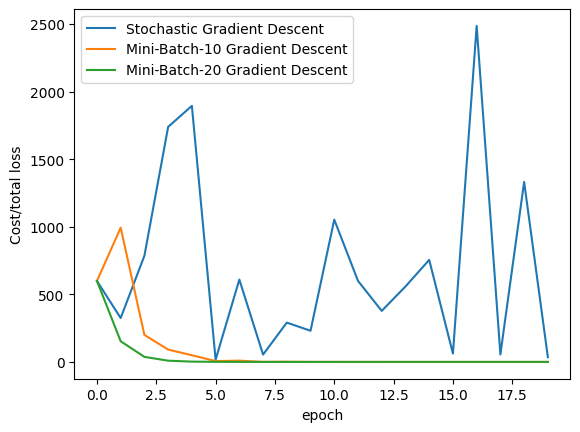

In [33]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.y = -5 * X
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Creating DataLoader object
dataset = Build_Data()
train_loader = DataLoader(dataset=dataset, batch_size=1)

step_size = 0.1
loss_SGD = []
n_iter = 20

for i in range(n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_SGD.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()

train_loader_10 = DataLoader(dataset=dataset, batch_size=10)

# Reset w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

loss_MBGD_10 = []

for i in range(n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_MBGD_10.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader_10:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()

train_loader_20 = DataLoader(dataset=dataset, batch_size=20)

# Reset w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

loss_MBGD_20 = []

for i in range(n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_MBGD_20.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader_20:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()

plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.plot(loss_MBGD_10,label="Mini-Batch-10 Gradient Descent")
plt.plot(loss_MBGD_20,label="Mini-Batch-20 Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/total loss')
plt.legend()
plt.show()

In [37]:
a = {"mmm":"6",
     "q":'7'}
for i in a:
    print(a[i])

6
7


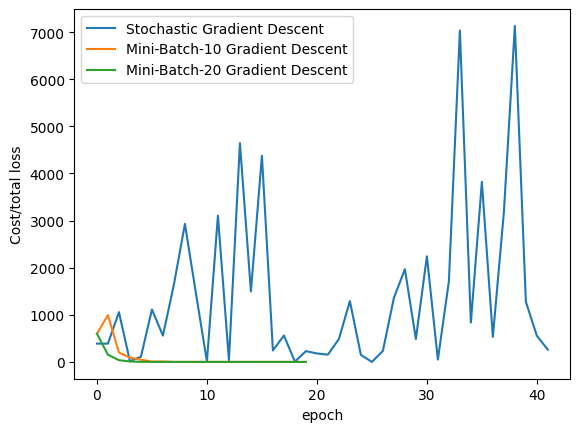

In [31]:
plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_MBGD_10,label = "Mini-Batch-10 Gradient Descent")
plt.plot(loss_MBGD_20,label = "Mini-Batch-20 Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/total loss')
plt.legend()
plt.show()

### The masking and causal masking: understanding it

In [5]:
import torch
attention_scores = torch.randn(6,6)

In [6]:
mask = torch.tril(torch.ones(6,6))
mask

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [7]:
attention_scores.masked_fill_(mask== 0, -1e9)
attention_scores.softmax(dim = -1)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3625, 0.6375, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5741, 0.2015, 0.2244, 0.0000, 0.0000, 0.0000],
        [0.0195, 0.4354, 0.0737, 0.4714, 0.0000, 0.0000],
        [0.0680, 0.1645, 0.4846, 0.2544, 0.0284, 0.0000],
        [0.0538, 0.1412, 0.2161, 0.1110, 0.3710, 0.1069]])

In [8]:
mask = torch.triu(torch.ones(1, 6, 6), diagonal=1).type(torch.int)
mask

tensor([[[0, 1, 1, 1, 1, 1],
         [0, 0, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0]]], dtype=torch.int32)

In [9]:
from datasets import load_dataset
ds = load_dataset('opus_books','en-it', split = 'train')

c:\Users\boys5\OneDrive\Desktop\Research\codebase\Transformer-from-Scratch\trans_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
src_text_pair= ds[0]
src_text = src_text_pair['translation']['en']
trg_text = src_text_pair['translation']['it']


In [13]:
from tokenizers import Tokenizer
tokenizer_src = Tokenizer.from_file('oaa.json')
sos_token = torch.tensor([tokenizer_src.token_to_id('[SOS]')], dtype = torch.int64)
eos_token = torch.tensor([tokenizer_src.token_to_id('[EOS]')], dtype = torch.int64)
pad_token = torch.tensor([tokenizer_src.token_to_id('[PAD]')], dtype = torch.int64)
sos_token, eos_token, pad_token

(tensor([2]), tensor([3]), tensor([1]))

In [16]:
enc_input_tokens = tokenizer_src.encode(src_text).ids
# dec_input_tokens = tokenizer.encode(trg_text).ids # it shd be target language tokenizer 
enc_input_tokens# dec_input_tokens

[5781, 38, 7699, 0]

In [18]:
from tokenizers import Tokenizer
tokenizer_src = Tokenizer.from_file('oaa.json')
sos_token = torch.tensor([tokenizer_src.token_to_id('[SOS]')], dtype = torch.int64)
eos_token = torch.tensor([tokenizer_src.token_to_id('[EOS]')], dtype = torch.int64)
pad_token = torch.tensor([tokenizer_src.token_to_id('[PAD]')], dtype = torch.int64)
tokenizer_trg = Tokenizer.from_file('tokenizer_it.json')
sos_token, eos_token, pad_token

(tensor([2]), tensor([3]), tensor([1]))

In [21]:
dec_input_tokens = tokenizer_trg.encode(trg_text).ids
dec_num_padding_tokens = seq_len - len(dec_input_tokens) -1

In [22]:
seq_len = 100
enc_num_padding_tokens = seq_len - len(enc_input_tokens) -2
dec_num_padding_tokens = seq_len - len(dec_input_tokens) -1

In [23]:
encoder_input = torch.cat(
    [
        sos_token,
        torch.tensor(enc_input_tokens, dtype = torch.int64),
        eos_token,
        torch.tensor([pad_token]*enc_num_padding_tokens, dtype = torch.int64)
    ]
)

In [24]:
decoder_input = torch.cat([
    sos_token,
    torch.tensor(dec_input_tokens, dtype = torch.int),
    torch.tensor([pad_token]*dec_num_padding_tokens, dtype = torch.int)

])

In [25]:
decoder_input.shape

torch.Size([100])

In [153]:
torch.tensor(701) &torch.tensor(701)

tensor(701)

In [30]:
!pip install altair

  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   ---------------------------------------- 795.4/795.4 kB 6.8 MB/s  0:00:00
Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl (18 kB)
Using cached referencing-0.37.0-py3-none-any.whl (26 kB)

   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------------- 1/6 [narwhals]
   ------ --------------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import altair as alt
def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = torch.triu(torch.ones(attn_shape), diagonal=1).type(
        torch.uint8
    )
    return subsequent_mask == 0
def example_mask():
    LS_data = pd.concat(
        [
            pd.DataFrame(
                {
                    "Subsequent Mask": subsequent_mask(20)[0][x, y].flatten(),
                    "Window": y,
                    "Masking": x,
                }
            )
            for y in range(20)
            for x in range(20)
        ]
    )

    return (
        alt.Chart(LS_data)
        .mark_rect()
        .properties(height=250, width=250)
        .encode(
            alt.X("Window:O"),
            alt.Y("Masking:O"),
            alt.Color("Subsequent Mask:Q", scale=alt.Scale(scheme="viridis")),
        )
        .interactive()
    )


example_mask()

alt.Chart(...)

In [57]:
size = 5
attn_shape = (1, size, size)
subsequent_mask = torch.tril(torch.ones(attn_shape)).type(
        torch.uint8
    )
subsequent_mask

tensor([[[1, 0, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 1, 0, 0],
         [1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1]]], dtype=torch.uint8)

In [56]:
torch.tril(torch.ones(5,5))

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [58]:
subsequent_mask

tensor([[[1, 0, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 1, 0, 0],
         [1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1]]], dtype=torch.uint8)

In [59]:
a = torch.randn(5,5)
v = a.masked_fill(subsequent_mask == 0, -1e9)
v.softmax(dim = -1)

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2987, 0.7013, 0.0000, 0.0000, 0.0000],
         [0.2308, 0.5581, 0.2111, 0.0000, 0.0000],
         [0.0867, 0.3944, 0.2957, 0.2233, 0.0000],
         [0.1674, 0.3249, 0.0959, 0.1307, 0.2812]]])

In [26]:
decoder_mask = (decoder_input != pad_token).unsqueeze(0).unsqueeze(0).int() 

In [27]:
causal_mask = torch.triu(torch.ones(1, decoder_input.shape[0], decoder_input.shape[0]), diagonal=1).type(torch.int)
causal_mask.shape

torch.Size([1, 100, 100])

In [101]:
encoder_input != pad_token

tensor([ True,  True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [111]:
encoder_mask = (encoder_input!=pad_token).unsqueeze(0).unsqueeze(0).int()

In [114]:
encoder_mask

tensor([[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]]], dtype=torch.int32)

In [ ]:
decoder_mask = (encoder_input!=pad_token)